In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [2]:
df = pd.read_csv("./data/diabetes.csv")
df.info()

X = df.drop(columns="Outcome")
y = df["Outcome"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
X_train, X_test, y_train, y_test = train = train_test_split(X, y, test_size=0.3)

# Initialize and fit odel on the training set
model = AdaBoostClassifier()
model.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [4]:
y_test_prediction = model.predict(X_test)

print(y_test_prediction)

[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1]


In [5]:
cm = confusion_matrix(y_test, y_test_prediction)
print(cm)
true_neg, false_pos, false_neg, true_pos = cm.ravel()
print(true_neg, false_pos, false_neg, true_pos)

[[135  23]
 [ 29  44]]
135 23 29 44


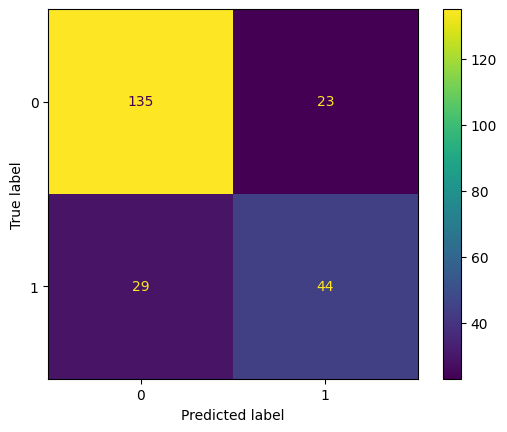

In [6]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [7]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

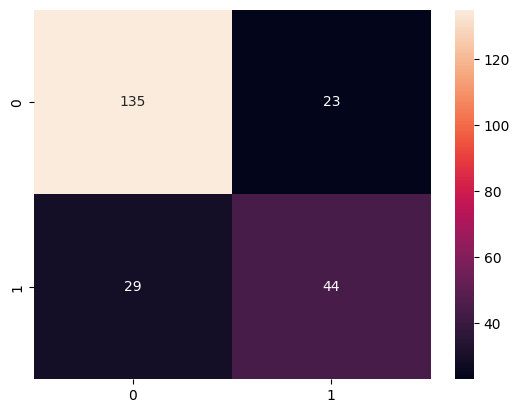

In [8]:
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm, annot=True, fmt='d', )

In [9]:
# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

In [10]:
# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)
plt.show()

In [11]:
accuracy = round(accuracy_score(y_test, y_test_prediction), 2)
print(accuracy)
accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
accuracy = round(accuracy, 2)
print(accuracy)

0.77
0.77


In [12]:
precision = round(precision_score(y_test, y_test_prediction), 2)
print(precision)
precision = true_pos/(true_pos+false_pos)
precision = round(precision, 2)
print(precision)

0.66
0.66


In [13]:
recall = round(recall_score(y_test, y_test_prediction), 2)
print(recall)
recall = true_pos / (true_pos + false_neg)
recall = round(recall, 2)
print(precision)

0.6
0.66
